# Project - Electric Vehicle
## Problem Statement  
Electric Vehicles (EVs) are rapidly transforming the automotive industry, but customers still face uncertainty about real-world range and performance.
## Problem Description
The goal of this project is to predict the range and sales trends of Electric Vehicles based on their specifications such as battery capacity, vehicle type, and model year, and to develop a Generative AI chatbot using models like GPT or Gemini that can answer user queries regarding EV features, sustainability benefits, and future market potential.

# Import Libraries

In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


In [6]:
# Load Dataset
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

# Show first five rows
df.head()


VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             270   
3            Clean Alternative Fuel Vehicle Eligible             210   
4  Eligibility unknown as battery range has not b...               0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  37.0       125701579   
1          0                   1.0       244285107   
2          0                  36.0       156773144   
3          0                   5.0       165103011   
4          0                  23.0       205138552   

                Vehicle Location  \
0   POINT (-122.30839 47.610365)   
1  POINT (-122.179458 47.802589)   
2   POINT (-122.34848 47.632405)   
3   POINT (-122.03646 47.534065)   
4   POINT (-122.55717 47.733415)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                         PUGET SOUND ENERGY INC       5.306105e+10  
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
4                         PUGET SOUND ENERGY INC       5.303594e+10

# Understand Dataset

In [8]:
# Dataset shape
df.shape

(177866, 17)

In [10]:
# Dataset info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [11]:
# Summary statistics
df.describe(include='all')

VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       177866  177861   177861  177866  177861.000000  177866.000000   
unique       10830     196      723      46            NaN            NaN   
top     7SAYGDEE6P    King  Seattle      WA            NaN            NaN   
freq          1239   92740    29447  177477            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98172.453506    2020.515512   
std            NaN     NaN      NaN     NaN    2442.450668       2.989384   
min            NaN     NaN      NaN     NaN    1545.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2019.000000   
50%            NaN     NaN      NaN     NaN   98122.000000    2022.000000   
75%            NaN     NaN      NaN     NaN   98370.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2024.000000   

          Make    Model           Electric Vehicle Type  \
count   177866   177866                          177866   
unique      40      139                               2   
top      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
freq     79659    35989                          139210   
mean       NaN      NaN                             NaN   
std        NaN      NaN                             NaN   
min        NaN      NaN                             NaN   
25%        NaN      NaN                             NaN   
50%        NaN      NaN                             NaN   
75%        NaN      NaN                             NaN   
max        NaN      NaN                             NaN   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
count                                              177866   177866.000000   
unique                                                  3             NaN   
top     Eligibility unknown as battery range has not b...             NaN   
freq                                                91950             NaN   
mean                                                  NaN       58.842162   
std                                                   NaN       91.981298   
min                                                   NaN        0.000000   
25%                                                   NaN        0.000000   
50%                                                   NaN        0.000000   
75%                                                   NaN       75.000000   
max                                                   NaN      337.000000   

            Base MSRP  Legislative District  DOL Vehicle ID  \
count   177866.000000         177477.000000    1.778660e+05   
unique            NaN                   NaN             NaN   
top               NaN                   NaN             NaN   
freq              NaN                   NaN             NaN   
mean      1073.109363             29.127481    2.202313e+08   
std       8358.624956             14.892169    7.584987e+07   
min          0.000000              1.000000    4.385000e+03   
25%          0.000000             18.000000    1.814743e+08   
50%          0.000000             33.000000    2.282522e+08   
75%          0.000000             42.000000    2.548445e+08   
max     845000.000000             49.000000    4.792548e+08   

                   Vehicle Location  \
count                        177857   
unique                          861   
top     POINT (-122.12302 47.67668)   
freq                           4574   
mean                            NaN   
std                             NaN   
min                             NaN   
25%                             NaN   
50%                             NaN   
75%                             NaN   
max                             NaN   

                                     Electric Utility  2020 Census Tract  
count                                          177861       1.778610e+05  
unique                                             76                NaN 

# Data Cleaning and Preprocessing

In [12]:
# Check for missing values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [13]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [14]:
# Fill or drop missing values where necessary
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
df['Model Year'].fillna(df['Model Year'].mode()[0], inplace=True)

/tmp/ipython-input-889348927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
/tmp/ipython-input-889348927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [15]:
# Clean categorical columns
df['Make'] = df['Make'].str.strip().str.title()
df['Model'] = df['Model'].str.strip()

In [16]:
# Cleaned Dataset Shape:
df.shape

(177866, 17)

# Exploratory Data Analysis (EDA)

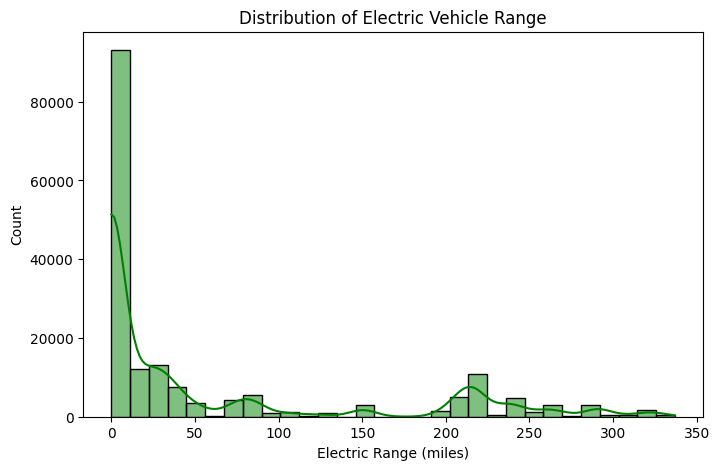

In [17]:
# Distribution of EV Range
plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()

In [18]:
# Top EV manufacturers
plt.figure(figsize=(10,6))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Number of Models")
plt.ylabel("Manufacturer")
plt.show()

/tmp/ipython-input-780469366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


# Insights Extraction

In [22]:
# Correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Basic insights
print("\nAverage Electric Range:", round(df['Electric Range'].mean(), 2), "miles")
print("Most common manufacturer:", df['Make'].mode()[0])
print("Earliest Model Year:", df['Model Year'].min(), "| Latest Model Year:", df['Model Year'].max())


Average Electric Range: 58.84 miles
Most common manufacturer: Tesla
Earliest Model Year: 1997 | Latest Model Year: 2024


# Problem Statement

To predict the electric range and sales trends of Electric Vehicles (EVs) based on their specifications such as battery capacity, make, model year, and vehicle type.
Additionally, to build a Generative AI chatbot using GPT/Gemini APIs to provide intelligent EV insights and recommendations.

# Save Preprocessed Data

In [24]:
df.to_csv("cleaned_ev_data.csv", index=False)
print("✅ Cleaned dataset saved successfully.")

✅ Cleaned dataset saved successfully.
